### About the Data
Context
Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back to another position. Currently, there are about over 500 bike-sharing programs around the world which are composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system in Washington, DC with the corresponding weather and seasonal information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mg
%matplotlib inline

In [5]:
trip_data = pd.read_csv('bike_sharing_data.csv', parse_dates= ['datetime'])

In [6]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [7]:
trip_data.sample(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2239,2011-06-01 05:00:00,2,0,1,2,27.06,29.545,89,6.0032,2,19,21
1688,2011-04-16 06:00:00,2,0,0,3,16.40,20.455,82,22.0028,1,9,10


In [17]:
import datetime as dt

In [18]:
trip_data['time'] = trip_data['datetime'].dt.time

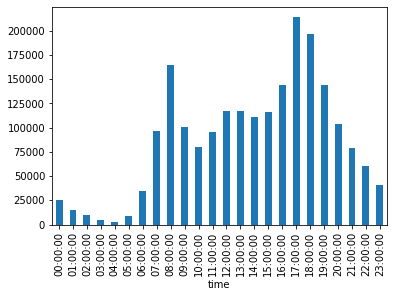

In [31]:
trip_data.groupby('time')['count'].sum().plot.bar()

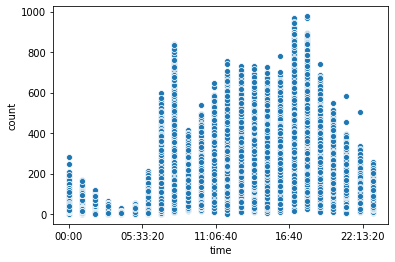

In [22]:
sns.scatterplot(x = 'time', y = 'count', data = trip_data)

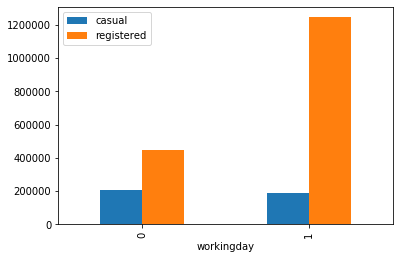

In [13]:
trip_data.groupby('workingday')['casual', 'registered'].sum().plot.bar()

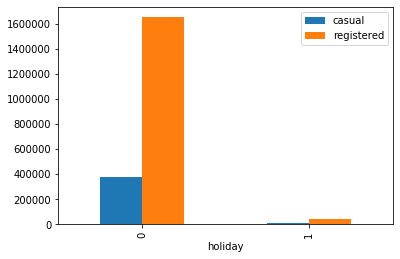

In [15]:
trip_data.groupby('holiday')['casual', 'registered'].sum().plot.bar()

In [43]:
trip_time = trip_data['time'].unique()

In [44]:
trip_time.astype('str')

array(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
       '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00',
       '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00',
       '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00',
       '20:00:00', '21:00:00', '22:00:00', '23:00:00'], dtype='<U8')

In [47]:
len(trip_time)

24

In [49]:
time_dic = {}
for i in range(0, len(trip_time)):
    time_dic[trip_time[i]] = i

In [51]:
trip_data['time']  = trip_data['time'].map(time_dic)

In [53]:
target_data = trip_data[['casual', 'registered', 'count']]

In [54]:
feature_data = trip_data.drop(columns = ['casual', 'registered', 'count', 'datetime'])

In [55]:
target_data1 =  target_data['count']

In [73]:
test= pd.read_csv('bike_sharing_data_test.csv', parse_dates= ['datetime'])

In [74]:
test['time'] = test['datetime'].dt.time

In [75]:
test['time']= test['time'].map(time_dic)

In [76]:
test.sample(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,time
2914,2011-11-30 00:00:00,4,0,1,1,14.76,16.665,62,27.9993,0
3117,2011-12-27 13:00:00,1,0,1,3,12.30,15.150,87,8.9981,13


In [77]:
testX = test.drop(columns = ['datetime'])

In [61]:
trainX = feature_data

In [62]:
trainY = target_data1

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
re = RandomForestRegressor(n_estimators= 100)

In [67]:
re.fit(trainX, trainY)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [78]:
pred = re.predict(testX)

In [93]:
test['count'] = pred

In [ ]:
from sklearn.metrics import 

In [82]:
sub_data = test[['datetime', 'count']]

In [86]:
sub_data.set_index('datetime',inplace= True)

In [87]:
sub_data.to_csv('bike_sub.csv')

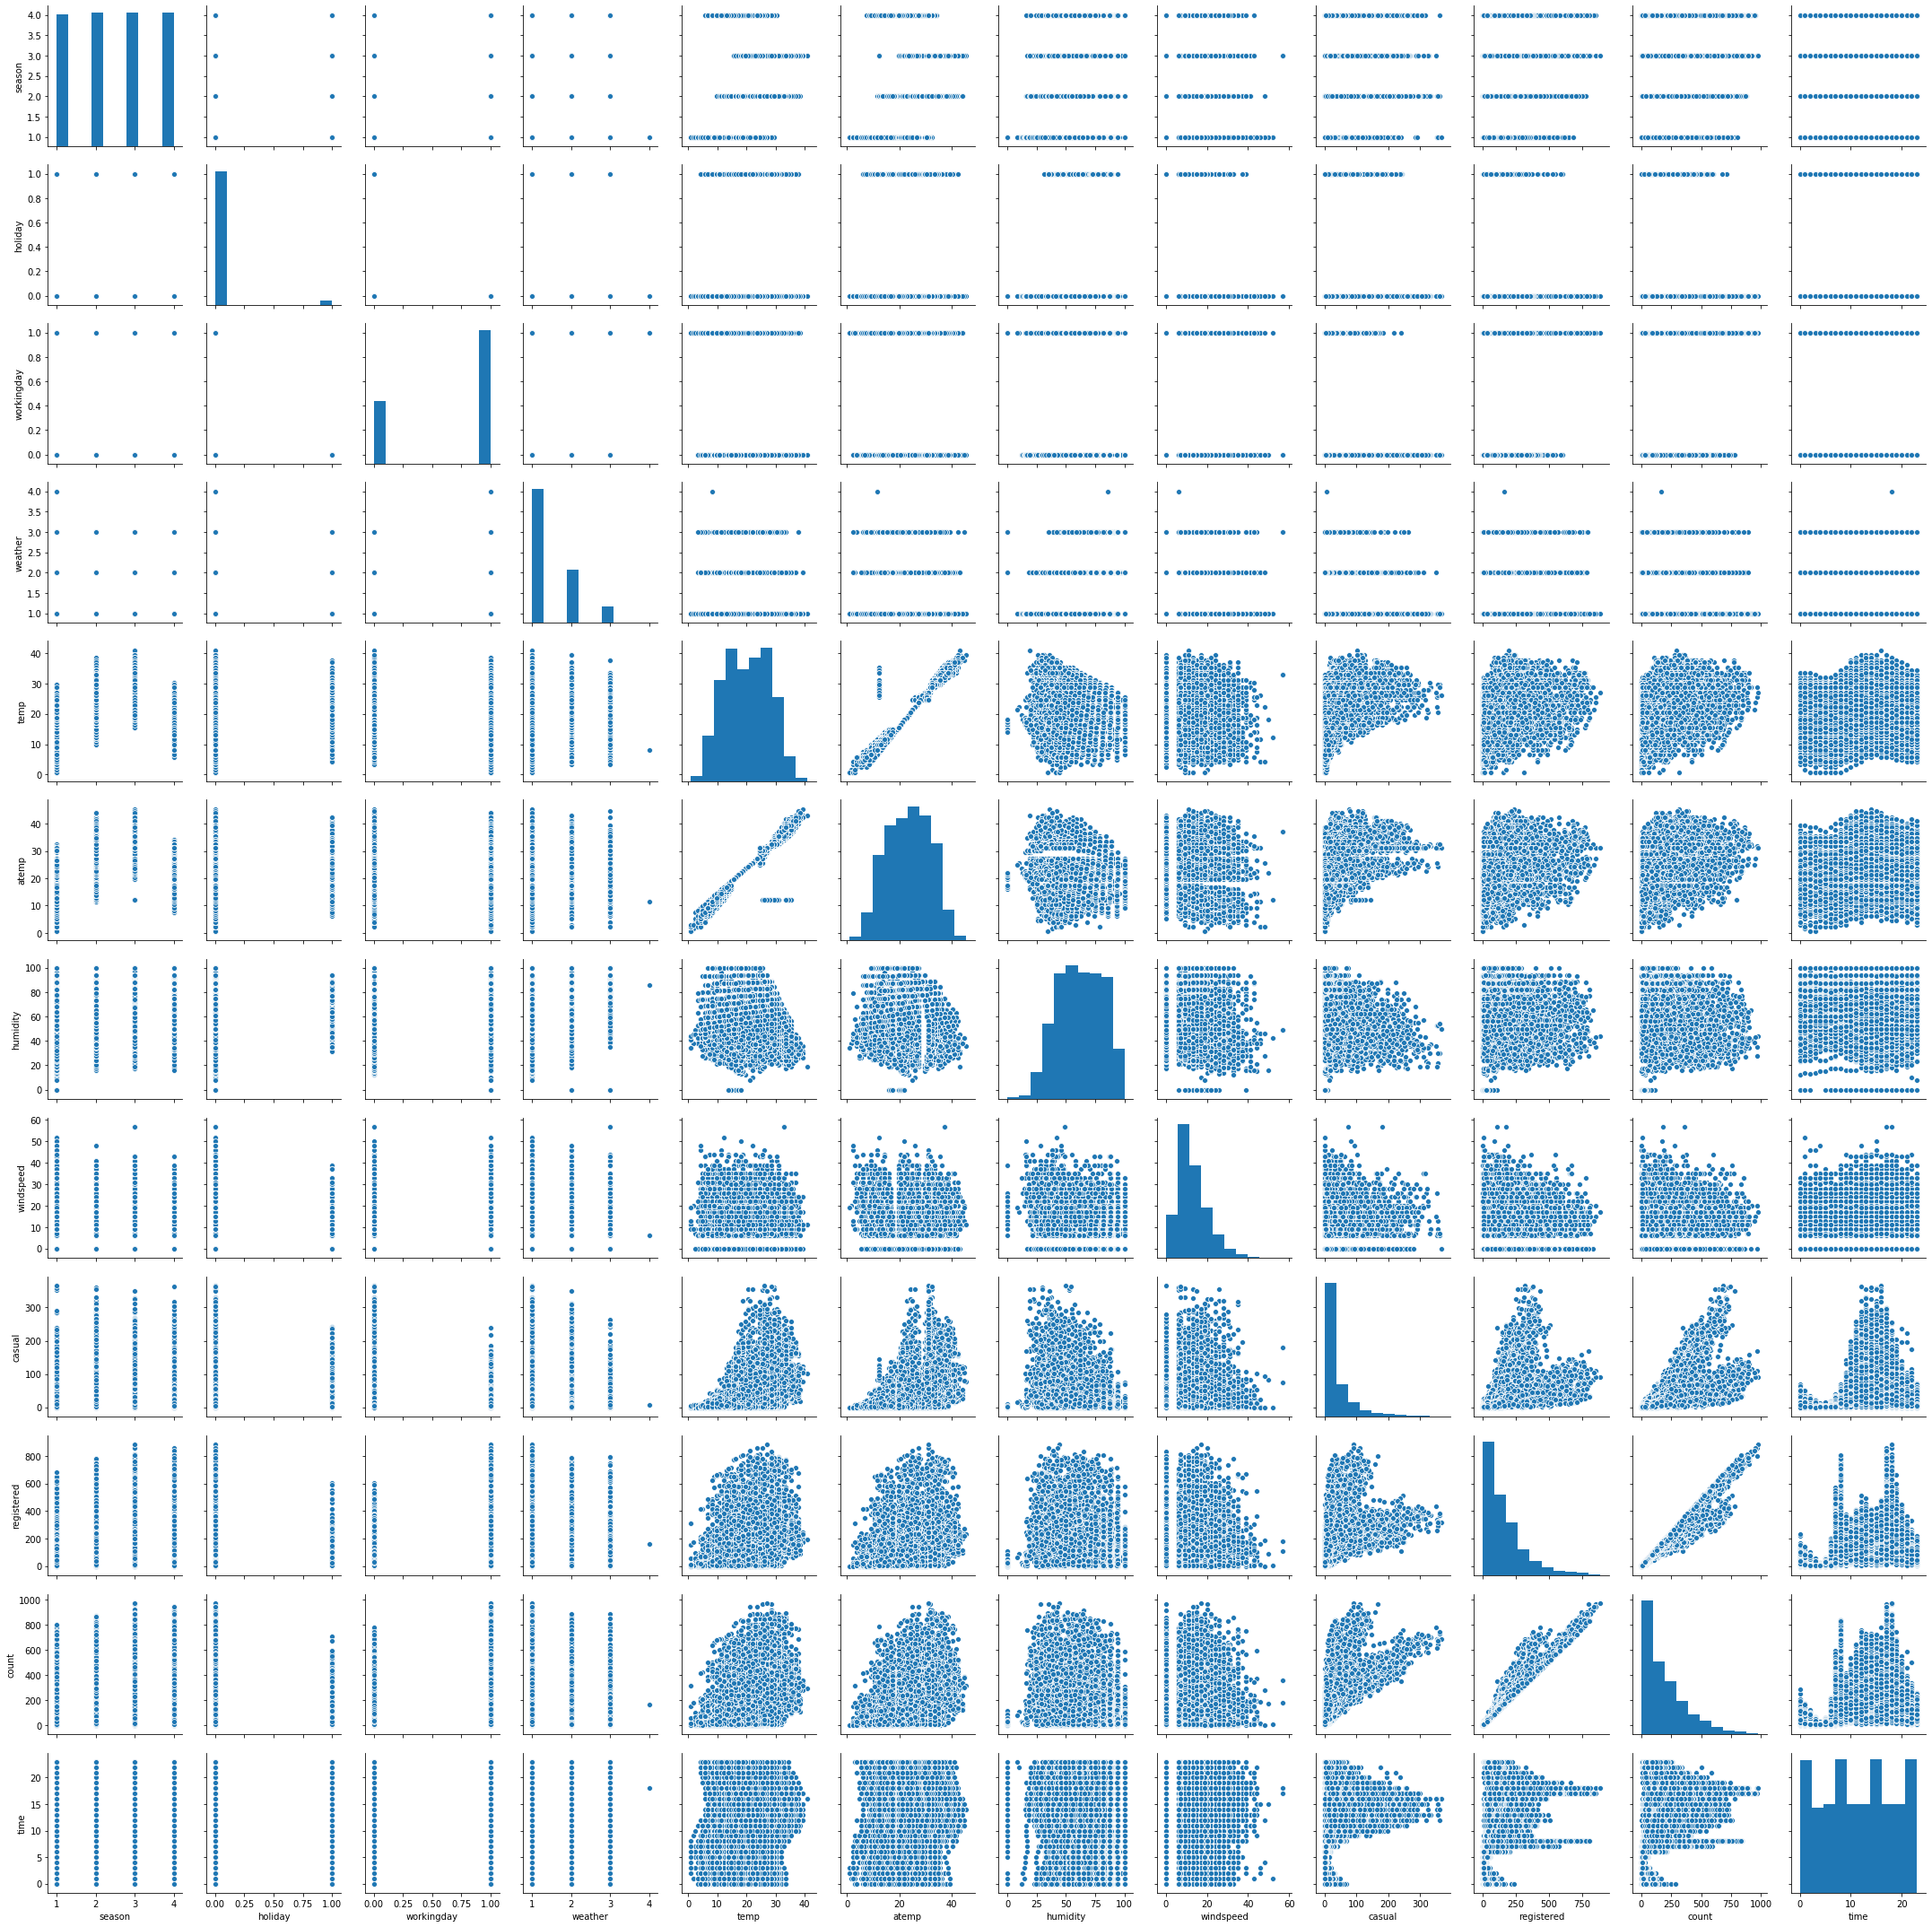

In [88]:
sns.pairplot(trip_data)

### Hyperparameter Tuning

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:

gs = GridSearchCV(re, param_grid={'n_estimators':[200,300,500], 'max_depth':[10,20,None]}, cv=5, n_jobs=4)

In [91]:
gs.fit(trainX, trainY)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=4,
             param_grid={'max_depth': [10, 20, None],
        

In [92]:
gs.best_params_

{'max_depth': 20, 'n_estimators': 500}

In [94]:
pred1 = gs.predict(testX)

In [96]:
test['count'] = pred1

In [98]:
sub_data1 = test[['datetime', 'count']]

In [100]:
sub_data1.set_index('datetime', inplace = True)

In [101]:
sub_data1.to_csv('bike_data1')

### Testing  the data with RSm and spliting the data

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
trainx, testx, trainy, testy = train_test_split(feature_data, target_data1)

In [105]:
re.fit(trainx, trainy)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [106]:
pred2 = re.predict(testx)

In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [108]:
mean_absolute_error(y_true= testy, y_pred= pred2)

46.95177500349883

In [109]:
mean_squared_error(y_pred= pred2, y_true= testy)

4977.561422115729

In [110]:
from sklearn.metrics import r2_score

In [111]:
r2_score(y_pred= pred2, y_true= testy)

0.8472660253919302

In [112]:
gs = GridSearchCV(re, param_grid={'n_estimators':[200,300,500], 'max_depth':[10,20,None]}, cv=5, n_jobs=4)

In [113]:
gs.fit(trainx, trainy)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=4,
             param_grid={'max_depth': [10, 20, None],
        

In [116]:
pred3 = gs.predict(testx)

In [117]:
mean_absolute_error(y_pred=pred3, y_true= testy)

46.6029921660099

In [118]:
data  = pd.read_csv('livepool_ion.csv')

### basic_model

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 3 columns):
time             float64
signal           float64
open_channels    int64
dtypes: float64(2), int64(1)
memory usage: 114.4 MB


In [124]:
feature_data = data.drop(columns = ['open_channels'])

In [125]:
target_data = data.open_channels

In [126]:
trainX, testX, trainY , testY = train_test_split(feature_data, target_data)

In [ ]:
re.fit(trainX, trainY)

In [ ]:
pred = re.predict(testX)

In [ ]:
re.score(testX, testY)